In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [9]:
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sepal_width', ylabel='petal_length'>

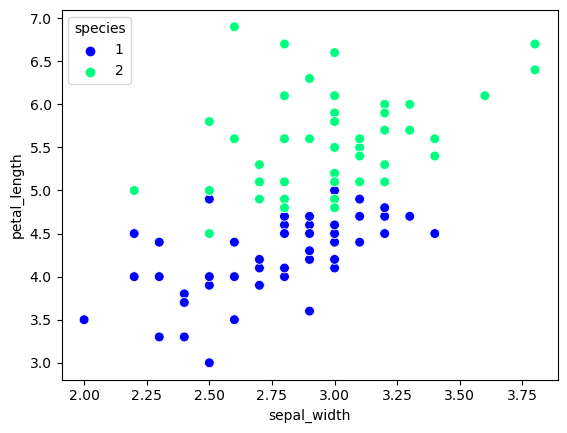

In [11]:
sns.scatterplot(
    x=df['sepal_width'], 
    y=df['petal_length'],
    hue=df['species'], 
    palette='winter',
    s = 50
    
)

In [12]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
75,3.0,4.4,1
63,2.9,4.7,1
85,3.4,4.5,1
91,3.0,4.6,1
51,3.2,4.5,1
68,2.2,4.5,1
103,2.9,5.6,2
96,2.9,4.2,1
56,3.3,4.7,1
59,2.7,3.9,1


In [13]:
df = df.sample(100) # randomly shuffles the data
# Taking only 10 rows for training
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [14]:
df_train

,sepal_width,petal_length,species
62,2.2,4.0,1
139,3.1,5.4,2
115,3.2,5.3,2
68,2.2,4.5,1
119,2.2,5.0,2
59,2.7,3.9,1
140,3.1,5.6,2
86,3.1,4.7,1
127,3.0,4.9,2
103,2.9,5.6,2


In [15]:
df_val

,sepal_width,petal_length,species
126,2.8,4.8,2
90,2.6,4.4,1
143,3.2,5.9,2
83,2.7,5.1,1
75,3.0,4.4,1


In [16]:
df_test

,sepal_width,petal_length,species
81,2.4,3.7,1
124,3.3,5.7,2
61,3.0,4.2,1
93,2.3,3.3,1
51,3.2,4.5,1


In [17]:
# Predictors and target
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [18]:
y_test

array([2, 1, 2, 1, 1])

# Case 1 - Bagging
#### Now we will train same base algorithm (in this case DT) on different subset of original training data
#### in this case, sampling will be done with replacement

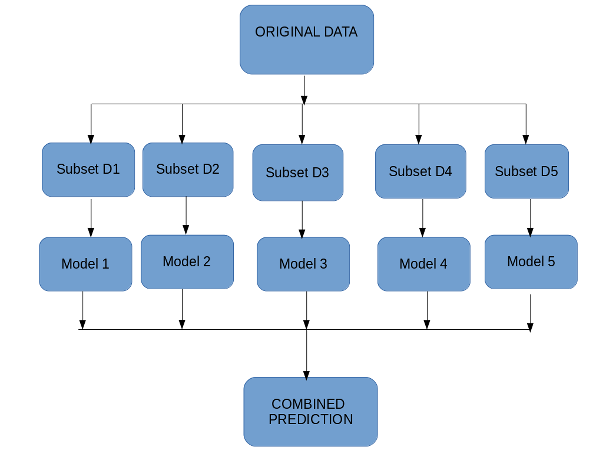

In [19]:

# Later Used, takes the classifier isnstance and data and returns its accuracy
def evaluate(clf, X, y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [20]:
# Data for D-Tree 1
# 8 random samples, some instances might be repeated as replace = True
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
59,2.7,3.9,1
127,3.0,4.9,2
127,3.0,4.9,2
119,2.2,5.0,2
62,2.2,4.0,1
59,2.7,3.9,1
86,3.1,4.7,1
62,2.2,4.0,1


In [21]:
# !pip install mlxtend

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

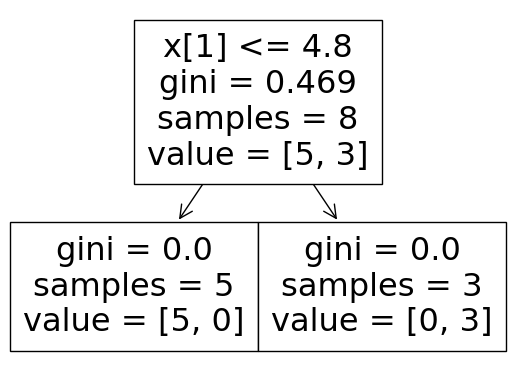

0.8


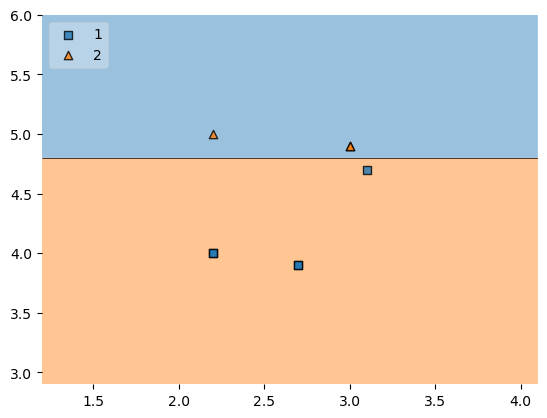

In [23]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X, y)

In [24]:
# Data for D-Tree 2 
df_bag = df_train.sample(8, replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
86,3.1,4.7,1
127,3.0,4.9,2
115,3.2,5.3,2
119,2.2,5.0,2
62,2.2,4.0,1
103,2.9,5.6,2
62,2.2,4.0,1
68,2.2,4.5,1


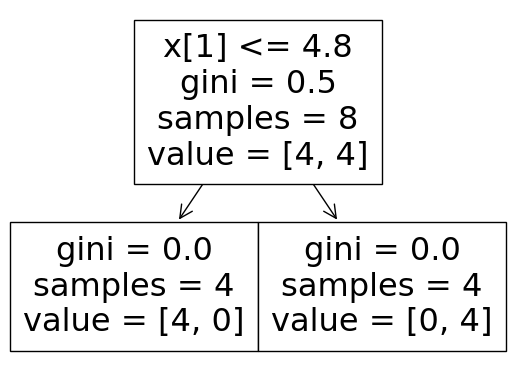

0.8


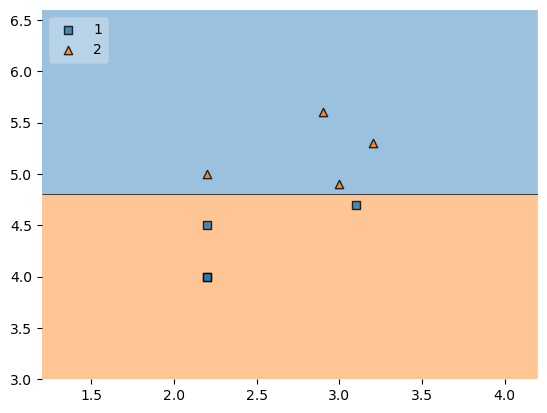

In [25]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [26]:
# Data for D-Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
68,2.2,4.5,1
119,2.2,5.0,2
115,3.2,5.3,2
86,3.1,4.7,1
140,3.1,5.6,2
139,3.1,5.4,2
62,2.2,4.0,1
140,3.1,5.6,2


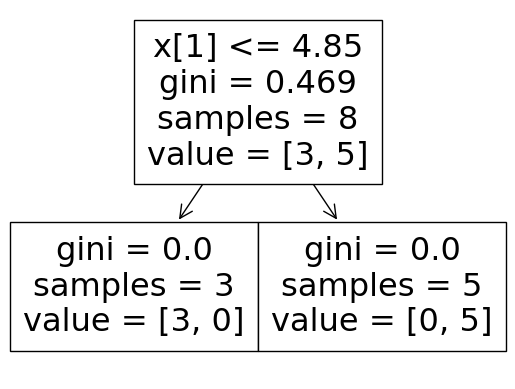

0.6


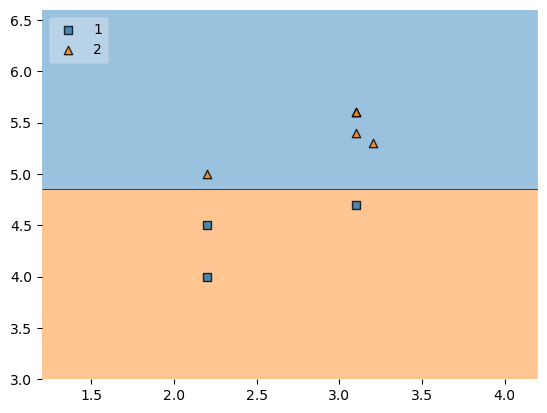

In [27]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

## Predict - Model Aggregation
#### Combining predictions from each base model

In [28]:
df_test

,sepal_width,petal_length,species
81,2.4,3.7,1
124,3.3,5.7,2
61,3.0,4.2,1
93,2.3,3.3,1
51,3.2,4.5,1


In [40]:
print("Predictor 1", dt_bag1.predict(np.array([3.3,5.7	]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([3.3,5.7	]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([3.3,5.7	]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


# Pasting

#### A case of bagging, in which samples are created without replacement, i.e. no duplicated instances in the sample

In [373]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
62,2.2,4.0,1
139,3.1,5.4,2
115,3.2,5.3,2
68,2.2,4.5,1
119,2.2,5.0,2
59,2.7,3.9,1
140,3.1,5.6,2
86,3.1,4.7,1
127,3.0,4.9,2
103,2.9,5.6,2


In [372]:
# Notice that here replace=False, no instance will be repeated
df_train.sample(8)

,sepal_width,petal_length,species
119,2.2,5.0,2
127,3.0,4.9,2
59,2.7,3.9,1
103,2.9,5.6,2
62,2.2,4.0,1
139,3.1,5.4,2
86,3.1,4.7,1
115,3.2,5.3,2


# Random Subspaces

#### In this case of Bagging, we don't do row sampling (i.e models are trained using all the rows in data), rather we do column sampling
#### in other words if we have large no. of columns we can use a subset of columns for ensemble training

In [375]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [376]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,versicolor
82,5.8,2.7,3.9,1.2,versicolor
137,6.4,3.1,5.5,1.8,virginica
145,6.7,3.0,5.2,2.3,virginica
66,5.6,3.0,4.5,1.5,versicolor
10,5.4,3.7,1.5,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa
43,5.0,3.5,1.6,0.6,setosa
24,4.8,3.4,1.9,0.2,setosa


In [403]:
# here axis= 1 (i.e. sampling from colummns)
# column might repeat as replace=True
df1.sample(n=2, replace=True, axis=1)

,sepal_width,sepal_length
92,2.6,5.8
82,2.7,5.8
137,3.1,6.4
145,3.0,6.7
66,3.0,5.6
10,3.7,5.4
34,3.1,4.9
0,3.5,5.1
43,3.5,5.0
24,3.4,4.8


# Random Patches

#### combines row sampling and column sampling both

In [404]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,versicolor
82,5.8,2.7,3.9,1.2,versicolor
137,6.4,3.1,5.5,1.8,virginica
145,6.7,3.0,5.2,2.3,virginica
66,5.6,3.0,4.5,1.5,versicolor
10,5.4,3.7,1.5,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa
43,5.0,3.5,1.6,0.6,setosa
24,4.8,3.4,1.9,0.2,setosa


In [405]:
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,sepal_length,petal_length
43,5.0,1.6
82,5.8,3.9
43,5.0,1.6
10,5.4,1.5
82,5.8,3.9
43,5.0,1.6
0,5.1,1.4
34,4.9,1.5


# References

<ul>
    <li><a ref=https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models>Enseble Learing Guide</link>
<ul>
    